# <center> Investigating Swollen Polymer Chain </center>

**Parameters:**
* $N = 1,\!500,\!001$
* $\Delta t = 0.0001$
* $\left\vert k_{\mathrm{ev}} \right\vert = 200$

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.optimize import curve_fit

𝑁 = 1500001                                           # iterations 
mm = (5, 10, 15, 20, 30, 40, 50, 60, 75, 90, 100)     # molecular masses
nbeads = 75                                          # No. beads (specific)
Δ𝑡 = .0001                                            # time-step
𝑘_ev = 200                                            # repulsion constant

𝑡 = []                                                # time array
tt = 0
for i in range(N):
    t.append(tt)
    tt += Δt
del tt

## Importing $R_{\mathrm{g}}$ & $R_{\mathrm{ee}}$ data

In [68]:
file = os.path.join('simulated_data', 'k_ev=200', f'ave_rg_ree_n{nbeads}-k_ev{k_ev}.dat')
Rg_all = np.loadtxt(file, skiprows=0)[:, 0]
Ree_all = np.loadtxt(file, skiprows=0)[:, 1]

Rg_all_i = []
Ree_all_i = []
for i in range(N):
    Rg_all_i.append([])
    Ree_all_i.append([])
    
for i in range(int(len(Rg_all)/N)):   
    for j in range(N):                 
        Rg_all_i[j].append(Rg_all[j + i*N])
        Ree_all_i[j].append(Ree_all[j + i*N])

# ▼▼ 1 trial ▼▼
Rg_ave, Ree_ave = Rg_all.tolist(), Ree_all.tolist()
        
# ▼▼ multiple trials ▼▼
#Rg_ave = []
#Ree_ave = []    
#for i in range(N):
#    Rg_ave.append(np.mean(Rg_all_i[i]))
#    Ree_ave.append(np.mean(Ree_all_i[i]))

## Curve fitting to find relaxation time

In [69]:
# Sanity Test
NoT = int(len(Rg_all)/N)
print(f"The number of trials is {NoT} and the number of iterations per trial is {N}.")

The number of trials is 1 and the number of iterations per trial is 1500001.


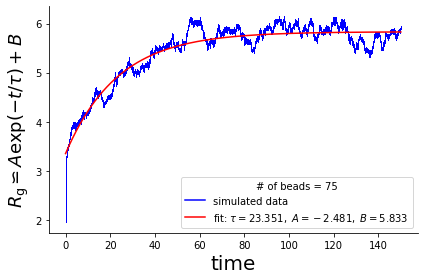

   𝜏 = 23.351046182975728982 ± 0.012721867926678015
   𝐴 = -2.480778259308170863 ± 0.000720546736766842
   𝐵 = 5.833411290383089920 ± 0.000226984295786932


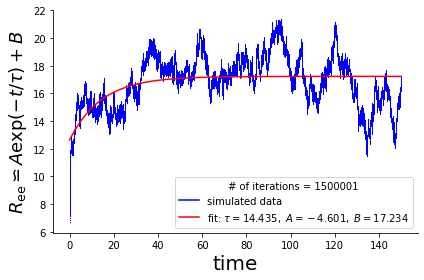

   𝜏 = 14.435422069807218648 ± 0.044109572509952351
   𝐴 = -4.601481624775175305 ± 0.008682764636315005
   𝐵 = 17.233810562538224076 ± 0.001716446843285607


In [70]:
percentage = 1

t = np.array(t)
def exp_decay(t, τ, A, B): 
    return A*np.exp(-t/τ) + B


p0 = (0.1, 1, 0)     # p0 = (τ0, A0, B0)
###### radius of gyration plots #####
plt.plot(t[0], Rg_ave[0], 'b', label='simulated data')  # "averaged simulated data"
plt.plot(t[0:int(N*percentage)], Rg_ave[0:int(N*percentage)], 'b,')#, label='averaged simulated data')     # [0:int(N*percentage)] without  plotting fit
popt, pcov = curve_fit(exp_decay, t[0:int(N*percentage)], Rg_ave[0:int(N*percentage)])
plt.plot(t[0:int(N*percentage)], exp_decay(t[0:int(N*percentage)], *popt), 'r-', label=r'fit: $\tau=%5.3f,~A=%5.3f,~B=%.3f$' % tuple(popt))
plt.xlabel(r"time", fontsize=20)
plt.ylabel(r"${R_\mathrm{g}} \,\backsimeq\, A\exp\left(-t/\tau\right)+B$", fontsize=18)

plt.legend(title=f"# of beads = {nbeads}") # handles=legend_elements
#plt.xlim(min(t), max(t))
#plt.ylim(min(Rg_ave[0:int(N*percentage)]), max(Rg_ave[0:int(N*percentage)]))

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.tight_layout()
#plt.savefig("rg_vs_t.pdf")
plt.show()

print('   𝜏 =', '%0.18f' % popt[0], '±', "%.18f" % pcov[0,0]**0.5) #2ND HALF IS FIT UNCERTAINTY
print('   𝐴 =', "%0.18f" % popt[1], '±', "%.18f" % pcov[1,1]**0.5)
print('   𝐵 =', "%0.18f" % popt[2], '±', "%.18f" % pcov[2,2]**0.5)
#####################################


##### end to end distance plots #####
plt.plot(t[0], Ree_ave[0], 'b', label='simulated data')  # "averaged simulated data"
plt.plot(t[0:int(N*percentage)], Ree_ave[0:int(N*percentage)], 'b,')#, label='averaged simulated data')     # [0:int(N*percentage)] without  plotting fit
popt, pcov = curve_fit(exp_decay, t[0:int(N*percentage)], Ree_ave[0:int(N*percentage)])     
plt.plot(t[0:int(N*percentage)], exp_decay(t[0:int(N*percentage)], *popt), 'r-', label=r'fit: $\tau=%5.3f,~A=%5.3f,~B=%.3f$' % tuple(popt))
plt.xlabel(r"time", fontsize=20)
plt.ylabel(r"${R_\mathrm{ee}} \,\backsimeq\, A\exp\left(-t/\tau\right)+B$", fontsize=18)

plt.legend(title=f"# of iterations = {int(𝑁*percentage)}") # handles=legend_elements
#plt.xlim(min(t), max(t))
#plt.ylim(min(Ree_ave), max(Ree_ave))

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.tight_layout()
#plt.savefig("rg_vs_t.pdf")
plt.show()

print('   𝜏 =', '%0.18f' % popt[0], '±', "%.18f" % pcov[0,0]**0.5) #2ND HALF IS FIT UNCERTAINTY
print('   𝐴 =', "%0.18f" % popt[1], '±', "%.18f" % pcov[1,1]**0.5)
print('   𝐵 =', "%0.18f" % popt[2], '±', "%.18f" % pcov[2,2]**0.5)

Note that the $y$-intercept of the $f(t) = Ae^{-t/\tau} + B$ function is $A + B$... Professor Klotz on why $f(t)$ is increasing vs when it was decreasing for $k_{\mathrm{ev}} = 0$:
> You're probably initializing the beads closer than their equilibrium length apart. But there's no law that says the simulation has to start overstretched.

Anyway, Based on the $R_{\mathrm{g}}$ & $R_{\mathrm{ee}}$ plots vs time, this data can perhaps produce more accurate results if only the roughly $5\%$ of the $N = 1500001$ time-steps are used! So I will look at the data corresponding to the ${t\in[0,7.5)}$ range for different molecular masses between $M = 5$ and $100$ and enter below... After looking at the first $5\%$ of data I have decided to analyze the initial ${x\%}$ instead; i.e., ${t}\in[0, \mathrm{floor}(N\times\texttt{percentage}))$!

&nbsp;&nbsp;&nbsp;&nbsp;$1\%$ of the was not satisfactory, the above hypothesis does not seem like a good idea. Instead, take the mean of $R_{\mathrm{g}}$ after the swollen chain has relaxed (I looked at the latter $85\%$ of data). That should produce an accurate *Flory exponent*, as for the relaxation time $\tau$, it *looks* like I might have to use the *autocorrelation method*.

In [7]:
mm = (5, 10, 15, 20, 30, 40, 50, 60, 75, 90, 100)


# p0 = (0.1, 1, 0) turned on:
τg = ['a','b','c','d']

𝜏ee = ['a','b','c','d']
# p0 turned off
"""
τg = 

τee = 
"""


# 15/85
𝑅g_ave_mean = (0.704937546162764, 1.223411204506494, 1.6794655516809742, 2.1021596463626526, 
                2.8016112456856965, 3.7370744642824856, 4.457658638845154, 5.122879133213113, 
                5.664617346743507, 5.668000519140377, 5.063526645493553)

𝑅ee_ave_mean = (1.7847189883694434, 3.163825457622334, 4.380943821435838, 5.12394607797464, 
                 7.611545891774332, 10.056898606584014, 9.969462637935745, 14.469142552428343, 
                 17.17364333204935, 17.597848403534787, 12.86052610349633)

α = -2
mm = mm[:α]; τg = τg[:α]; τee = τee[:α]; Rg_ave_mean = Rg_ave_mean[:α]; Ree_ave_mean = Ree_ave_mean[:α]

### $\langle R_{\mathrm{g}}\rangle$ & $\langle R_{\mathrm{ee}}\rangle$ vs chain length

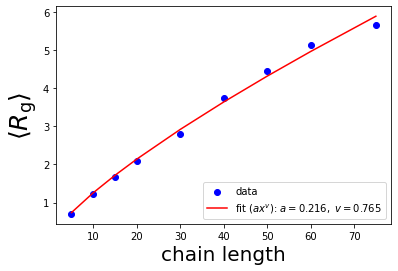

   𝑎 = 0.215996409197808326 ± 0.022877433676966232
   𝑣 = 0.765305701467287380 ± 0.026899571654868521


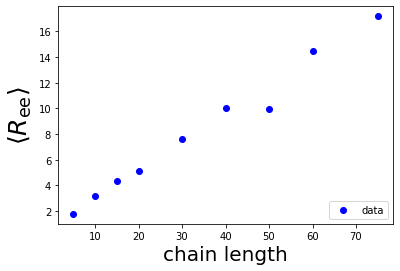

   𝑎 = 0.379078390342439120 ± 0.094765903523142417
   𝑣 = 0.878254004620798723 ± 0.062833317768467331


In [9]:
def power(x, a, v):
    return a*x**v


plt.scatter((mm), (Rg_ave_mean), label='data', color='blue')
popt, pcov = curve_fit(power, mm, Rg_ave_mean) 
plt.plot(mm, power(mm, *popt), 'r-', label=r'fit $\left(ax^v\right)$: $a=%5.3f,~v=%.3f$' % tuple(popt))
plt.legend(loc=4)
plt.xlabel(r"chain length", fontsize=20)
plt.ylabel(r"$\left\langle{R_\mathrm{g}}\right\rangle$", fontsize=25)
#plt.savefig("plots/Rg_v_mm_scatter_fit.pdf", bbox_inches='tight')
plt.show()
print('   𝑎 =', '%0.18f' % popt[0], '±', "%.18f" % pcov[0,0]**0.5) #THE 2ND HALF IS CODE FOR CALCULATING FIT UNCERTAINTY
print('   𝑣 =', "%0.18f" % popt[1], '±', "%.18f" % pcov[1,1]**0.5)

plt.scatter(mm, Ree_ave_mean, label='data', color='blue')
popt, pcov = curve_fit(power, mm, Ree_ave_mean) 
#plt.plot(mm, power(mm, *popt), 'r-', label=r'fit $\left(ax^b\right)$: $a=%5.3f,~b=%.3f$' % tuple(popt))
plt.legend(loc=4)
plt.xlabel(r"chain length", fontsize=20)
plt.ylabel(r"$\left\langle{R_\mathrm{ee}}\right\rangle$", fontsize=25)
#plt.savefig("plots/Ree_v_mm_scatter_fit.pdf", bbox_inches='tight')
plt.show()
print('   𝑎 =', '%0.18f' % popt[0], '±', "%.18f" % pcov[0,0]**0.5) #THE 2ND HALF IS CODE FOR CALCULATING FIT UNCERTAINTY
print('   𝑣 =', "%0.18f" % popt[1], '±', "%.18f" % pcov[1,1]**0.5)

### $\tau_{\mathrm{g}}$ & $\tau_{\mathrm{ee}}$ vs chain length

```python
def power(x, a, v):
    return a*x**v


# τg
plt.scatter(mm, τg, color='blue', label='data')

popt, pcov = curve_fit(power, mm, τg) 
plt.plot(mm, power(mm, *popt), 'r-', label=r'fit $\left(ax^v\right)$: $a=%5.3f,~v=%.3f$' % tuple(popt))
#plt.plot(yg, 'r-', label=r'fit $\left(ax^b\right)$: $a=%5.3f,~b=%.3f$' % tuple(popt))
plt.legend()

plt.xlabel(r"chain length", fontsize=20)
plt.ylabel(r"$\tau_{\mathrm{g}}$", fontsize=25)
#plt.savefig("plots/τg_v_mm_scatter_fit.pdf", bbox_inches='tight')
plt.show()
print('   a =', '%0.18f' % popt[0], '±', "%.18f" % pcov[0,0]**0.5) #THE 2ND HALF IS CODE FOR CALCULATING FIT UNCERTAINTY
print('   𝑣 =', "%0.18f" % popt[1], '±', "%.18f" % pcov[1,1]**0.5)


# τee
plt.scatter(mm, τee, color='blue', label='data')

popt, pcov = curve_fit(power, mm, τee) 
plt.plot(mm, power(mm, *popt), 'r-', label=r'fit $\left(ax^v\right)$: $a=%5.3f,~v=%.3f$' % tuple(popt))
#plt.plot(yee, 'r-', label=r'fit $\left(ax^b\right)$: $a=%5.3f,~b=%.3f$' % tuple(popt))
plt.legend()

plt.xlabel(r"chain length", fontsize=20)
plt.ylabel(r"$\tau_{\mathrm{ee}}$", fontsize=25)
#plt.savefig("plots/τee_v_mm_scatter_fit.pdf", bbox_inches='tight')
plt.show()
print('   a =', '%0.18f' % popt[0], '±', "%.18f" % pcov[0,0]**0.5) #THE 2ND HALF IS CODE FOR CALCULATING FIT UNCERTAINTY
print('   𝑣 =', "%0.18f" % popt[1], '±', "%.18f" % pcov[1,1]**0.5)
```

## Final configuration plot

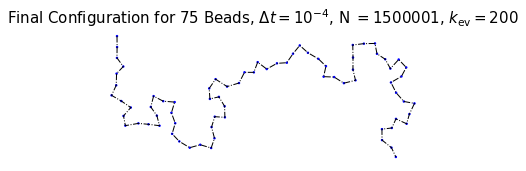

In [71]:
arr = np.load(f'pos_data/data/k_ev=200/nbeads{nbeads}-k_ev{k_ev}.npy') 
N = len(arr[0])           

final_x = []
final_y = []
for bead in arr:     # saving final positions of each bead in chain
    final_x.append(bead[N-1, 0])
    final_y.append(bead[N-1, 1])

fig, ax = plt.subplots()
ax.scatter(final_x, final_y, color='white')
plt.plot(final_x, final_y, 'k-.', linewidth=1)

cir = []
for i in range(len(final_x)):
    cir.append(plt.Circle((final_x[i], final_y[i]), 0.04, color='b',fill=True))

ax.set_aspect('equal', adjustable='datalim')
for i in range(len(cir)):
    ax.add_patch(cir[i])

plt.axis('scaled'); plt.axis(False)
plt.title(f"Final Configuration for {nbeads} Beads, " r"$\Delta t = 10^{-4}$, N" f" $= {N}$," r" $k_{\mathrm{ev}} = $" f"{k_ev}", size=15)
plt.show()